In [1]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import nibabel as nib

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow import keras
from keras.models import load_model
from keras import backend as K
import seaborn as sns
from keras.applications.vgg16 import VGG16

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# Organizing the training and validation sets of images using ImageDataGenerator

In [4]:
in_h = 512
in_w = 512

batch_size = 32

In [5]:
train_datagen = None
train_generator = None

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Covid_data/Training Set/1-100',  
        target_size=(in_h, in_w),  
        batch_size=batch_size,
        color_mode="grayscale",
        classes = ['covid','non-covid'],
        class_mode='binary')

Found 36592 images belonging to 2 classes.


In [ ]:
val_datagen = None
val_generator = None

val_datagen = ImageDataGenerator(rescale=1/255)
val_generator = val_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Covid_data/Validation Set/1-100',  
        target_size=(in_h, in_w),  
        batch_size=batch_size,
        color_mode="grayscale",
        classes = ['covid','non-covid'],
        class_mode='binary')

Found 15598 images belonging to 2 classes.


In [ ]:
val_datagen = None
val_generator = None

val_datagen = ImageDataGenerator(rescale=1/255)
val_generator = val_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Covid_data/Validation Set/1-100',  
        target_size=(in_h, in_w),  
        batch_size=batch_size,
        color_mode="grayscale",
        classes = ['covid','non-covid'],
        class_mode='binary')

In [ ]:
y_train = train_generator.classes
y_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
y_val = val_generator.classes 
y_val

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
in_h = 227
in_w = 227

batch_size = 32

In [ ]:
train_datagen = None
train_generator = None

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Covid_data/Training Set/1-100',  
        target_size=(in_h, in_w),  
        batch_size=batch_size,
        color_mode="grayscale",
        classes = ['covid','non-covid'],
        class_mode='binary')

Found 36592 images belonging to 2 classes.


In [ ]:
val_datagen = None
val_generator = None

val_datagen = ImageDataGenerator(rescale=1/255)
val_generator = val_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Covid_data/Validation Set/1-100',  
        target_size=(in_h, in_w),  
        batch_size=batch_size,
        color_mode="grayscale",
        classes = ['covid','non-covid'],
        class_mode='binary')

Found 15598 images belonging to 2 classes.


In [ ]:
y_train = train_generator.classes
y_train

y_val = val_generator.classes 
y_val

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
steps_per_epoch = train_generator.samples//batch_size

# Modified AlexNet#

Number of filters are reduced

In [ ]:
Mod_AlexNet = tf.keras.models.Sequential([
    # 1st conv
  tf.keras.layers.Conv2D(10, (11,11),strides=(4,4), activation='relu', input_shape=(in_h, in_w, 1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
  tf.keras.layers.Conv2D(18, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(18, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(18, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(12, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
  tf.keras.layers.Dense(512, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
  #To FC layer 2
  tf.keras.layers.Dense(10, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(2)
])

# Modified AlexNEt with Adadelta optim


In [ ]:
Mod_AlexNet.compile(optimizer='adadelta', loss="binary_crossentropy", metrics=['accuracy'])

Mod_AlexNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 10)        1220      
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 10)        40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 18)        21798     
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 18)        72        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 18)        2934      
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 18)        7

In [ ]:
Mod_AlexNet.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=15)

Epoch 1/15
1143/1143 [==============================] - 9843s 9s/step - loss: 4.7703 - accuracy: 0.5367
Epoch 2/15
1143/1143 [==============================] - 697s 610ms/step - loss: 4.4864 - accuracy: 0.5321
Epoch 3/15
1143/1143 [==============================] - 682s 596ms/step - loss: 4.2223 - accuracy: 0.5286
Epoch 4/15
1143/1143 [==============================] - 680s 595ms/step - loss: 4.0266 - accuracy: 0.5273
Epoch 5/15
1143/1143 [==============================] - 692s 605ms/step - loss: 3.8240 - accuracy: 0.5236
Epoch 6/15
1143/1143 [==============================] - 689s 602ms/step - loss: 3.6275 - accuracy: 0.5229
Epoch 7/15
1143/1143 [==============================] - 690s 603ms/step - loss: 3.4727 - accuracy: 0.5210
Epoch 8/15
1143/1143 [==============================] - 685s 599ms/step - loss: 3.3603 - accuracy: 0.5207
Epoch 9/15
1143/1143 [==============================] - 686s 600ms/step - loss: 3.2334 - accuracy: 0.5207
Epoch 10/15
1143/1143 [=========================

In [ ]:
Mod_AlexNet.evaluate(val_generator)

488/488 [==============================] - 3272s 7s/step - loss: 3.7277 - accuracy: 0.5137


[3.7276651859283447, 0.5136556029319763]

In [ ]:
feature_extractor=Mod_AlexNet.predict(train_generator)
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [ ]:
feature_extractor.shape

(36592, 2)

## Classification with Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [ ]:
RF_model.fit(features, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
X_val_feature = Mod_AlexNet.predict(val_generator)
X_val_features = X_val_feature.reshape(X_val_feature.shape[0], -1)

In [ ]:
prediction_RF = RF_model.predict(X_val_features)

In [ ]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_val, prediction_RF))
print ("Macro f1_score = ", metrics.f1_score(y_val, prediction_RF))

Accuracy =  0.5001282215668675
Macro f1_score =  0.5504756413952148


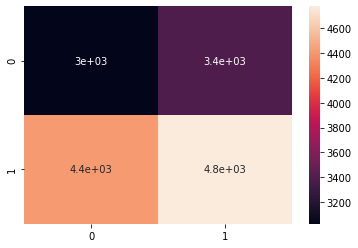

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, prediction_RF)
sns.heatmap(cm, annot=True)

(32, 227, 227, 1)
(227, 227, 1)
The prediction for this image is:  0
The actual label for this image is:  0


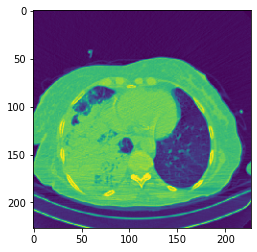

In [ ]:
batch=next(train_generator) 
print(batch[0].shape)
img=batch[0][0] 
print (img.shape)
plt.imshow(np.reshape(img,(img.shape[0],img.shape[1])))

input_img = np.expand_dims(img, axis=0) 
input_img_feature=Mod_AlexNet.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", y_train[0])

## Classification with SVM

In [ ]:
from sklearn.svm import SVC

SVC_model = SVC(kernel='linear', random_state=42)

In [ ]:
SVC_model.fit(features, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
prediction_SVC = SVC_model.predict(X_val_features)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_val, prediction_SVC))
print ("Macro f1_score = ", metrics.f1_score(y_val, prediction_SVC))

Accuracy =  0.5889857674060777
Macro f1_score =  0.7413354851724834


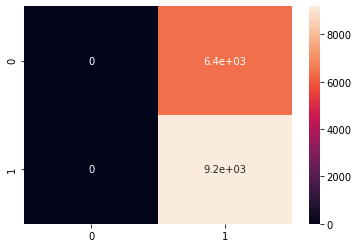

In [ ]:
cm = confusion_matrix(y_val, prediction_SVC)
sns.heatmap(cm, annot=True)

(32, 227, 227, 1)
(227, 227, 1)
The prediction for this image is:  1
The actual label for this image is:  0


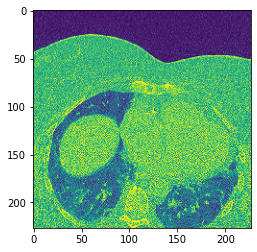

In [ ]:
batch=next(train_generator) 
print(batch[0].shape)
img=batch[0][0] 
print (img.shape)
plt.imshow(np.reshape(img,(img.shape[0],img.shape[1])))

input_img = np.expand_dims(img, axis=0) 
input_img_feature=Mod_AlexNet.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_SVC = SVC_model.predict(input_img_features)[0] 
print("The prediction for this image is: ", prediction_SVC)
print("The actual label for this image is: ", y_train[0])